In [109]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
# plot inline
%matplotlib inline

df = pd.read_pickle('/home/hermuba/data/drug/tmacc_df')
df.drop('ACTIVITY', axis=1, inplace=True)
df.set_index('chem_name', drop=True, append=False, inplace=True)

new_df = df.fillna(0)

norm_tmacc = new_df.apply(lambda x: (x - x.mean()) / x.std(), axis=0)
norm_tmacc.dropna(axis = 1, inplace = True) # some std = 0, provide no info therefore remove them; normalized showed best result in clustering


In [110]:
amr_data = pd.read_pickle('/home/hermuba/data/annotated_RIS/anno_sps_df')
cluster = pd.read_pickle('/home/hermuba/data/genePredicted/cdhit/ec0102_df')
card = pd.read_pickle('/home/hermuba/data/aro_pattern_df')

# look at the data:
X1 = norm_tmacc contains the chemical structure

X2 = cluster (cdhit)

X3 = card 

Y = amr_data contains RIS data

# The Interaction
What we want to do is to know the relation between X1 and other Xs and how that affects the value Y


In [111]:
norm_tmacc.head()

Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:0  \
chem_name                                                                                
ertapenem                                            -0.184834                           
cephalexin                                           -0.184774                           
clindamycin                                          -0.184834                           
polymyxin b                                          -0.184834                           
tilmicosin                                            0.376230                           

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:1  \
chem_name                                                                                
ertapenem                                             0.702718                           
cephalexin                                            0.691906                           
clindamycin                                          -0.937013                           
polymyxin b                                          -0.954075                           
tilmicosin                                           -0.369839                           

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:10  \
chem_name                                                                                 
ertapenem                                            -0.248025                            
cephalexin                                           -0.343372                            
clindamycin                                          -0.423961                            
polymyxin b                                          -0.277021                            
tilmicosin                                           -0.282836                            

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:11  \
chem_name                                                                                 
ertapenem                                            -0.442361                            
cephalexin                                           -0.957601                            
clindamycin                                          -0.764142                            
polymyxin b                                           0.650878                            
tilmicosin                                            0.721641                            

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:12  \
chem_name                                                                                 
ertapenem                                             0.538993                            
cephalexin                                           -0.811671                            
clindamycin                                          -0.809029                            
polymyxin b                                           0.957437                            
tilmicosin                                            0.909756                            

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:13  \
chem_name                                                                                 
ertapenem                                             3.167554                            
cephalexin                                           -0.629556                            
clindamycin                                          -0.629475                            
polymyxin b                                           1.058729                            
tilmicosin                                            1.085684                            

             Maximum:ScaledAtomPartialPositiveCharge:ScaledAtomPartialPositiveCharge:14  \
chem_name                                                                                 
ertapenem        

In [112]:
amr_data['Antibiotic'] = amr_data['Antibiotic'].str.lower()
amr_data.head()

index Taxon ID  Genome ID                                   Genome Name  \
0      0  1438670  1438670.3                     Escherichia coli BIDMC 62   
1      3  1438776  1438776.3                  Klebsiella pneumoniae CHS 72   
2      4      573   573.9724          Klebsiella pneumoniae strain AR_0098   
3      6  1400157  1400157.3                    Escherichia coli BIDMC 43b   
4      9    72407  72407.183  Klebsiella pneumoniae subsp. pneumoniae 1785   

                    Antibiotic Resistant Phenotype Measurement  \
0                  ceftriaxone           Resistant         >32   
1                    ertapenem           Resistant         NaN   
2  amoxicillin/clavulanic acid           Resistant      >32/16   
3                     imipenem        Intermediate           2   
4      piperacillin/tazobactam     Non-susceptible       >64/4   

  Measurement Sign Measurement Value Measurement Unit  \
0                >                32             mg/L   
1              NaN               nan              NaN   
2                >             32/16             mg/L   
3              NaN                 2             mg/L   
4                >              64/4             mg/L   

  Laboratory Typing Method Laboratory Typing Method Version  \
0                      MIC                              NaN   
1                      MIC                              NaN   
2                      MIC                              NaN   
3                      MIC                              NaN   
4                      MIC                              NaN   

  Laboratory Typing Platform Vendor Testing Standard Testing Standard Year  \
0                        NaN    NaN              NaN                   NaN   
1                        NaN    NaN              NaN                   NaN   
2                        NaN    NaN             CLSI                   NaN   
3                        NaN    NaN              NaN                   NaN   
4                        NaN    NaN             CLSI                  2013   

  Source      Species  
0    NaN  Escherichia  
1    NaN   Klebsiella  
2    NaN   Klebsiella  
3    NaN  Escherichia  
4    NaN   Klebsiella

In [113]:
#show drug combination
amr_data.loc[amr_data['Antibiotic'].str.contains('/')] # not all of them with "/" in MIC

index Taxon ID  Genome ID  \
2          4      573   573.9724   
4          9    72407  72407.183   
7         13  1304918  1304918.4   
10        22  1329852  1329852.3   
12        28  1328443  1328443.3   
15        32  1329820  1329820.3   
24        45  1439318  1439318.3   
40        79  1304922  1304922.3   
44        88      573   573.6973   
46        90  1438798  1438798.3   
61       114  1284801  1284801.3   
62       117  1438756  1438756.3   
69       127  1438754  1438754.3   
74       134  1329813  1329813.3   
79       140      573   573.1734   
90       160  1284806  1284806.4   
94       165  1284830  1284830.3   
96       167      573   573.1731   
100      172  1438681  1438681.3   
108      182    72407  72407.222   
117      197  1438803  1438803.3   
131      224  1284825  1284825.3   
132      228  1329832  1329832.3   
134      231  1438768  1438768.3   
137      235  1438771  1438771.3   
142      245      562  562.12960   
157      270  1284802  1284802.4   
165      284  1328363  1328363.3   
174      300    72407  72407.189   
177      303    72407  72407.180   
...      ...      ...        ...   
15747   1428      287   287.2972   
15807   1489      287   287.2563   
15981   1668    47885    47885.7   
16063   1750      287   287.2974   
16152   1842      287   287.2976   
16229   1922      287   287.2979   
16231   1924  1611770  1611770.3   
16232   1925      287   287.2977   
16298   1993      287   287.2979   
16354   2050      287   287.2974   
16415   2111      287   287.2980   
16418   2114      287   287.2979   
16522   2220      287   287.2980   
16574   2273  1611770  1611770.3   
16608   2307  1611770  1611770.3   
16639   2339      287   287.2978   
16775   2477      287   287.1477   
16779   2481      287   287.2974   
16796   2498      287   287.2980   
16868   2572      287   287.1482   
17035   2744      287   287.2973   
17090   2799      287   287.1482   
17093   2802      287   287.2980   
17099   2808      287   287.2975   
17110   2819      287   287.2976   
17182   2892      287   287.2976   
17189   2899      287   287.2977   
17205   2916  1611770  1611770.3   
17220   2931      287   287.1477   
17226   2937      287   287.2977   

                                             Genome Name  \
2                   Klebsiella pneumoniae strain AR_0098   
4           Klebsiella pneumoniae subsp. pneumoniae 1785   
7                         Klebsiella pneumoniae 120_1020   
10                         Enterobacter cloacae UCICRE 3   
12                            Escherichia coli BIDMC 19A   
15                               Enterobacter sp. MGH 11   
24                           Citrobacter freundii MGH 56   
40                        Klebsiella pneumoniae 500_1420   
44                       Klebsiella pneumoniae strain 11   
46                          Klebsiella pneumoniae MGH 75   
61                         Klebsiella pneumoniae UHKPC48   
62                          Klebsiella pneumoniae CHS 50   
69                          Klebsiella pneumoniae CHS 48   
74                                Enterobacter sp. MGH 4   
79                  Klebsiella pneumoniae strain KpVA-16   
90                         Klebsiella pneumoniae UHKPC18   
94                        Klebsiella pneumoniae VAKPC276   
96                  Klebsiella pneumoniae strain KpVA-13   
100                            Escherichia coli BIDMC 77   
108         Klebsiella pneumoniae subsp. pneumoniae 1824   
117                         Klebsiella pneumoniae UCI 56   
131                       Klebsiella pneumoniae VAKPC254   
132                              Enterobacter sp. MGH 34   
134                         Klebsiella pneumoniae CHS 62   
137                         Klebsiella pneumoniae CHS 65   
142                      Escherichia coli strain AR_0048   
157                        Klebsiella pneumoniae UHKPC33   
165                         Klebsiella pneumoniae MGH 18   
174         Klebsiella pneumoniae 

In [114]:
# joining dataframe
print(set(norm_tmacc.index).difference(set(amr_data['Antibiotic'].unique()))) # in TMACC but not in amr
print(set(amr_data['Antibiotic'].unique()).difference(set(norm_tmacc.index))) # in amr_data but not in TMACC

{'sulbactam', 'cefoperazone', 'tazobactam', 'clavulanic acid', 'amoxicillin', 'sulfamethoxazole'}
{'ticarcillin-clavulanic acid', 'ampicillin/sulbactam', 'trimethoprim/sulfamethoxazole', 'amoxicillin/clavulanic acid', 'sulphonamides', 'cefoperazone/sulbactam', 'cefotaxime/clavulanic acid', 'ticarcillin/clavulanic acid', 'piperacillin/tazobactam', 'penicillin', 'carbapenem', 'ceftazidime/clavulanic acid', 'tulathromycin'}


# let's pick E.coli and clusters for analysis
1. let's ignore the combinations for preliminary analysis
2. ignore those w/o TMACC descriptor
3. look for dependencies in data (X)
4. regression without interaction
5. regression with interaction
6. regression with polynomial terms

In [279]:
# join dataframe
tmacc_amr = norm_tmacc.merge(amr_data[['Genome ID', 'Measurement Value', 'Species', 'Antibiotic', 'Resistant Phenotype']] , right_on='Antibiotic', left_index = True, suffixes=('_x', '_y'))
tmacc_amr_num = tmacc_amr.loc[tmacc_amr['Measurement Value'] != 'nan']

# some numeric operation
import math
tmacc_amr_num['log_mic'] = pd.to_numeric(tmacc_amr_num['Measurement Value'])
tmacc_amr_num['log_mic'] = tmacc_amr_num['log_mic'].apply(lambda x:np.log(x)/np.log(2)) # log transformation
tmacc_amr_num = tmacc_amr_num.loc[tmacc_amr_num['log_mic'].apply(np.isfinite)]

# join gene with tmacc
all_num = tmacc_amr_num.merge(cluster, left_on = 'Genome ID', right_index = True) #using Ecoli as a test
all_num_card = tmacc_amr_num.loc[tmacc_amr_num['Species'] == 'Escherichia'].merge(card, left_on = 'Genome ID', right_index = True) #using Ecoli as a test
all_sps_card = tmacc_amr_num.merge(card, left_on = 'Genome ID', right_index = True) #using Ecoli as a test

# indexing
tmacc_id = tmacc_amr.columns[:-5]
card_id = all_num_card.columns[-189:]
cluster_id = all_num.columns[-15950:]


/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/hermuba/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [281]:
def simple_correlation(df, column_sets):
    sim_corr = []
    for col in column_sets:
        corr = df['log_mic'].corr(df[col])
        sim_corr.append(corr)
    return(np.array(sim_corr))

In [300]:
def itxn_correlation(df, cset1, cset2):
    itxn_corr = []
    itxn_features = pd.DataFrame()
    for col1 in cset1:
        for col2 in cset2:
            itxn = df[col1].multiply(df[col2])
            
            corr = df['log_mic'].corr(itxn)
            itxn_corr.append(corr)
            if corr > 0.6:
                itxn_features[str(col1)+':'+str(col2)] = itxn
    return(np.array(itxn_corr), itxn_features)

# TMACC v.s. MIC

In [286]:
# all data regardless of sps
all_corr = simple_correlation(tmacc_amr_num, tmacc_id)

In [288]:
corr_d = {'all': all_corr}

In [298]:
# WHAT ABOUT STRATIFIED WITH SPECIES
for sps in tmacc_amr['Species'].unique():
    sub_df = tmacc_amr_num.loc[tmacc_amr['Species'] == sps]
    
    corr_d[sps]=np.nan_to_num(np.array(simple_correlation(sub_df, tmacc_id))) # why is there nan
    

[Text(0,0,'all'),
 Text(0,0,'Klebsiella'),
 Text(0,0,'Enterobacter'),
 Text(0,0,'Escherichia'),
 Text(0,0,'nan'),
 Text(0,0,'Citrobacter'),
 Text(0,0,'Acinetobacter spp.'),
 Text(0,0,'Pseudomonas aeruginosa'),
 Text(0,0,'Salmonella')]

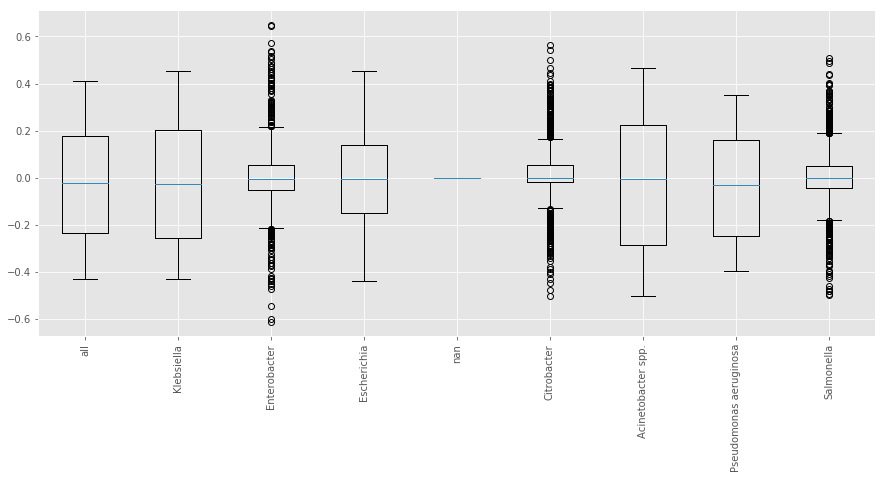

In [293]:
fig = plt.figure(1, figsize=(15, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.boxplot(corr_d.values())
ax.set_xticklabels(corr_d.keys(), rotation = 90)


# looking into interaction

In [ ]:
corr_d['Escherichia_cdhit'] = np.nan_to_num(simple_correlation(all_num, cluster_id))
corr_d['Escherichia_card'] = np.nan_to_num(simple_correlation(all_num_card, card_id))

itxn_corr, cluster_f = itxn_correlation(all_num, tmacc_id, cluster_id) 
corr_d['Escherichia_itxn'] = np.nan_to_sum(itxn_corr)
itxn_corr, card_f = itxn_correlation(all_num_card, tmacc_id, card_id)
corr_d['Escherichia_card_itxn'] = np.nan_to_sum(itxn_corr)



KeyError: 'Escherichia_itxn'

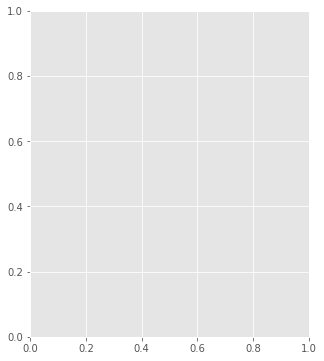

In [297]:
fig = plt.figure(1, figsize=(5, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.boxplot([corr_d[x] for x in ['all', 'Escherichia', 'Escherichia_itxn', 'Escherichia_card_itxn', 'Escherichia_cdhit', 'Escherichia_card']])
ax.set_xticklabels(['all', 'Escherichia', 'Escherichia itxn', 'Escherichia_itxn_card', 'Escherichia_cdhit', 'Escherichia_card'], rotation = 90)

In [209]:
## Without a constant

import statsmodels.api as sm

def try_regression(df,x):

    X = df[x]
    X = sm.add_constant(X)
    y = df['log_mic']

    # Note the difference in argument order
    model = sm.OLS(y, X.astype(float)).fit()
    predictions = model.predict(X) # make the predictions by the model
    print(model.summary())
    # Print out the statistics
    return(model.rsquared, model.tvalues, model.f_test)

In [202]:
r,t,f = try_regression(all_num, tmacc_id)
print(r)

                            OLS Regression Results                            
Dep. Variable:                log_mic   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     10.72
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           2.80e-36
Time:                        13:04:31   Log-Likelihood:                -1182.8
No. Observations:                 563   AIC:                             2424.
Df Residuals:                     534   BIC:                             2549.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [206]:
r,t,f = try_regression(all_num, cluster_id)
print(t[1])

/home/hermuba/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                log_mic   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.947
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           2.63e-10
Time:                        13:08:33   Log-Likelihood:                -1231.7
No. Observations:                 563   AIC:                             2573.
Df Residuals:                     508   BIC:                             2812.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Cluster 0         0.0018      0.002      1.128

TypeError: 'method' object is not subscriptable

In [210]:
r,t,f = try_regression(all_num, tmacc_id.append(cluster_id))
print(r)

/home/hermuba/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                log_mic   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     11.72
Date:                Thu, 11 Jan 2018   Prob (F-statistic):           1.34e-73
Time:                        17:02:16   Log-Likelihood:                -998.95
No. Observations:                 563   AIC:                             2164.
Df Residuals:                     480   BIC:                             2524.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [218]:
r,t,f = try_regression(all_num_card, card_id)

                            OLS Regression Results                            
Dep. Variable:                log_mic   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     9.861
Date:                Fri, 12 Jan 2018   Prob (F-statistic):          1.11e-166
Time:                        08:34:06   Log-Likelihood:                -13512.
No. Observations:                6228   AIC:                         2.728e+04
Df Residuals:                    6098   BIC:                         2.816e+04
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
3001404       -0.1263      0.141     -0.899      0.3

/home/hermuba/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [219]:
r,t,f = try_regression(all_num_card, card_id.append(tmacc_id))

/home/hermuba/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hermuba/miniconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


                            OLS Regression Results                            
Dep. Variable:                log_mic   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     65.00
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        08:34:54   Log-Likelihood:                -10750.
No. Observations:                6228   AIC:                         2.186e+04
Df Residuals:                    6047   BIC:                         2.308e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                                                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

In [235]:
itxn_card_corr = []
card_itxn = pd.DataFrame()
for x1 in card_id:
    for x2 in tmacc_id:
        itxn = all_num_card[x1].multiply(all_num_card[x2])
        corr = pd.to_numeric(all_num_card['log_mic']).corr(itxn)
        itxn_card_corr.append(corr)
        if corr > 0.6:
            card_itxn[str(x1)+str(x2)] = itxn
        else: 
            print("useless")
        # interaction
        

useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless
useless


In [239]:
len(itxn_card_corr)


164619

In [242]:
itxn_corr = []
cluster_itxn = pd.DataFrame()
for x1 in cluster_id:
    for x2 in tmacc_id:
        itxn = all_num[x1].multiply(all_num[x2])
        corr = pd.to_numeric(all_num['log_mic']).corr(itxn)
        itxn_corr.append(corr)
        if corr > 0.6:
            card_itxn[str(x1)+str(x2)] = itxn
      

KeyboardInterrupt: 

In [244]:
len(itxn_corr)

4659864